In [1]:
!pip install mlxtend

     |████████████████████████████████| 1.3 MB 3.2 MB/s eta 0:00:01


In [2]:
import numpy as np
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import pandas as pd

In [3]:
# Set the default figure size for the notebook, so they are not all tiny
matplotlib.rcParams['figure.figsize'] = (8,6)
%config InlineBackend.figure_formats = ['svg']

# Colors that can be read on a projector
matplotlib.rcParams['image.cmap'] = 'Set1'

In [4]:
# This example derives from the ISL 9.6.1 and 9.6.2 labs
scipy.random.seed(1)
gaussian_2d = scipy.stats.multivariate_normal(mean=np.zeros(2),
                                              cov=np.diag(np.ones(2)))
X = gaussian_2d.rvs(size=20)
y = np.array([-1]*10 + [1]*10)
X[y==1,:] = X[y==1,:] + 1


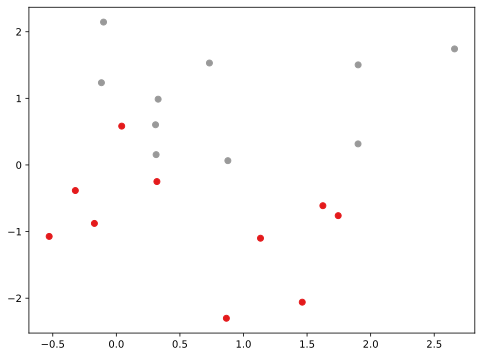

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [6]:
from sklearn import svm

In [7]:
svm_fit = svm.SVC(C=1, kernel='linear').fit(X,y)
svm_fit

SVC(C=1, kernel='linear')

In [8]:
# Plotting decision regions in python is pretty annoying.
# The mlxtend package seems to help!
from mlxtend.plotting import plot_decision_regions

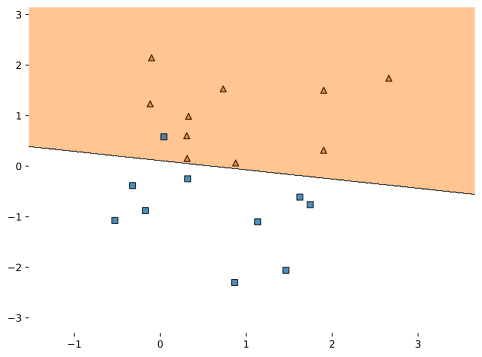

In [9]:
plot_decision_regions(X=X,y=y,clf=svm_fit, legend=0)
plt.show()

Let's consider a harder problem

In [10]:
# This example derives from the ISL 9.6.1 and 9.6.2 labs
scipy.random.seed(1)
X = gaussian_2d.rvs(size=200)
X[0:100,:] = X[0:100,:] + 2
X[100:150,:] = X[100:150,:] - 2
y = np.array([-1]*150 + [1]*50)


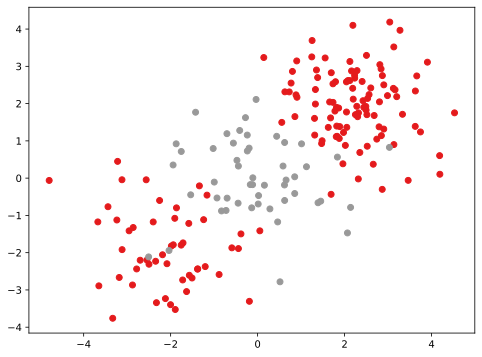

In [11]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [12]:
svm_fit = svm.SVC(C=1, kernel='rbf', gamma='auto').fit(X,y)
svm_fit

SVC(C=1, gamma='auto')

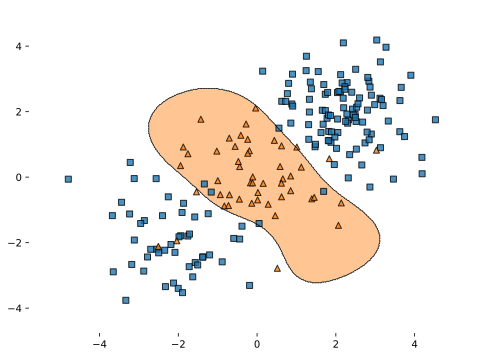

In [13]:
plot_decision_regions(X=X, y=y, clf=svm_fit, legend=0)
plt.show()

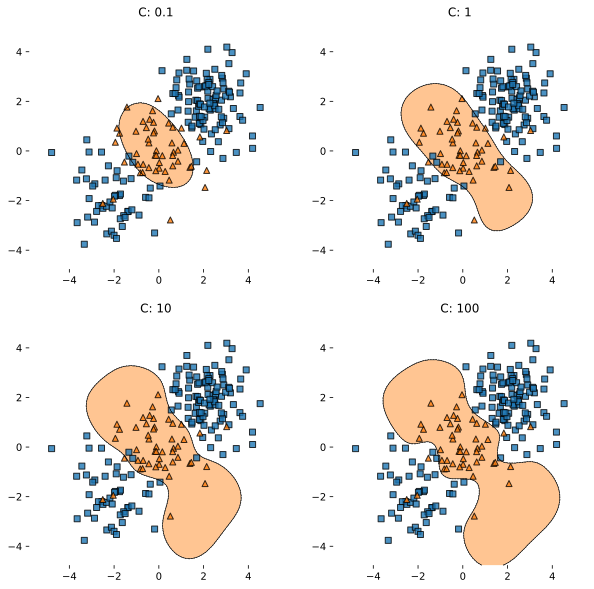

In [14]:
import matplotlib.gridspec as gridspec
import itertools


Clist = [0.1, 1, 10, 100]
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10, 10))

for C, grd in zip(Clist, itertools.product([0, 1],[0,1])):
    svm_fit = svm.SVC(C=C, kernel='rbf', gamma='auto').fit(X,y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X, y=y, clf=svm_fit, legend=0)
    plt.title('C: ' + str(C))

plt.show()

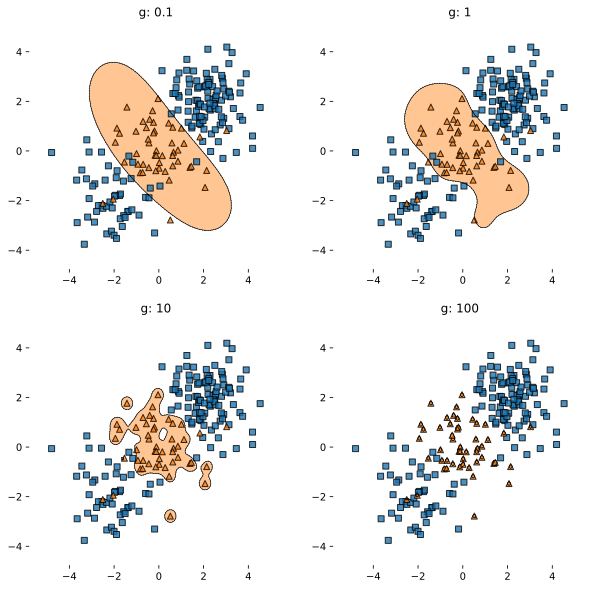

In [15]:
import matplotlib.gridspec as gridspec
import itertools


glist = [0.1,1,10, 100]
gs = gridspec.GridSpec(2,2)
fig = plt.figure(figsize=(10, 10))

for g, grd in zip(glist, itertools.product([0, 1],[0,1])):
    svm_fit = svm.SVC(C=1, gamma=g, kernel='rbf').fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_decision_regions(X=X,y=y,clf=svm_fit, legend=0)
    plt.title('g: ' + str(g))

plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = [
  {'C': [0.01, 0.05, 0.1, 0.5, 1, 10, 100, 1000], 'gamma': [1,0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
 ]
svm_obj = svm.SVC()
svm_cv = GridSearchCV(svm_obj, param_grid, error_score=0, cv=3)
svm_cv.fit(X,y)


GridSearchCV(cv=3, error_score=0, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.05, 0.1, 0.5, 1, 10, 100, 1000],
                          'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
                          'kernel': ['rbf']}])

In [18]:
sorted(svm_cv.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_gamma',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [19]:
svm_cv.best_estimator_

SVC(C=0.1, gamma=0.5)

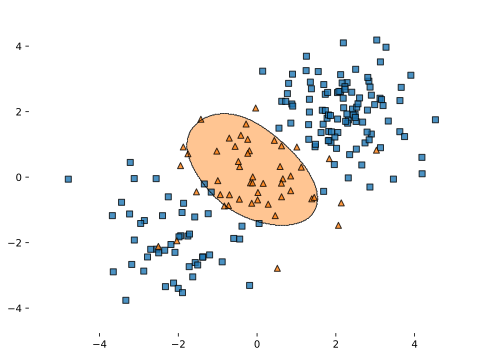

In [20]:
plot_decision_regions(X=X,y=y,clf=svm_cv.best_estimator_, legend=0)
plt.show()